# Nadam

## Importing the libiraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report
from keras.layers import Input  # Import Input function
from tensorflow.keras import datasets, layers,models


## Splitting the dataset into the Training set and Test set

In [5]:
(X_train, y_train), (X_test, y_test) =datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Normalize pixel values to range [0, 1]


In [12]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [13]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

## Define a shallow network


In [15]:
# Define the model
model = models.Sequential([
    Input(shape=(32, 32, 3)),               # Input layer specifying input shape  3072+10/2  1024
    layers.Flatten(),                      # Flatten the input image
    layers.Dense(512, activation='relu'),  # Single hidden layer with 512 neurons
    layers.Dense(10, activation='softmax') # Output layer for 10 classes y-label encoding
])

## Compile the model with Nadam optimizer


In [17]:
optimizer = tf.keras.optimizers.Nadam()
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


##  Train the model


In [19]:
start_time = time.time()

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2) #50000*0.2=40000/64=625
end_time = time.time()
training_time = end_time - start_time
print(f"\nTotal Training Time: {training_time:.2f} seconds")

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2945 - loss: 2.1231 - val_accuracy: 0.3835 - val_loss: 1.7429
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3999 - loss: 1.7013 - val_accuracy: 0.4060 - val_loss: 1.6829
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4372 - loss: 1.5951 - val_accuracy: 0.4305 - val_loss: 1.6188
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4541 - loss: 1.5497 - val_accuracy: 0.4090 - val_loss: 1.6652
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4647 - loss: 1.5142 - val_accuracy: 0.4628 - val_loss: 1.5489
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4758 - loss: 1.4805 - val_accuracy: 0.4698 - val_loss: 1.5150
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4909 - loss: 1.4382 - val_accuracy: 0.4612 - val_loss: 1.5273
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5004 - loss: 1.4088 - val_accu

## Making the classification Report

In [21]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

print("classification Report:  \n",classification_report(y_test,y_pred_classes))
print("NADAM Accuracy:  \n",accuracy_score(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
classification Report:  
               precision    recall  f1-score   support

           0       0.56      0.55      0.56      1000
           1       0.53      0.70      0.61      1000
           2       0.39      0.30      0.34      1000
           3       0.35      0.29      0.32      1000
           4       0.40      0.48      0.44      1000
           5       0.47      0.26      0.33      1000
           6       0.45      0.71      0.55      1000
           7       0.62      0.51      0.56      1000
           8       0.59      0.66      0.62      1000
           9       0.56      0.48      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000

NADAM Accuracy:  
 0.4935


## Visualize Training History (Accuracy and Loss)


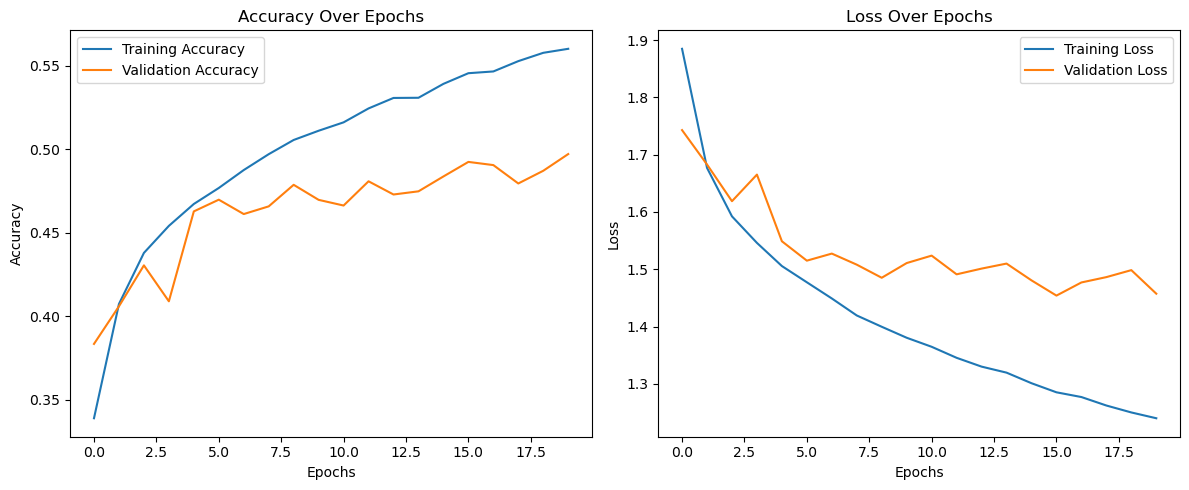

In [23]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Confusion Matrix Visualization

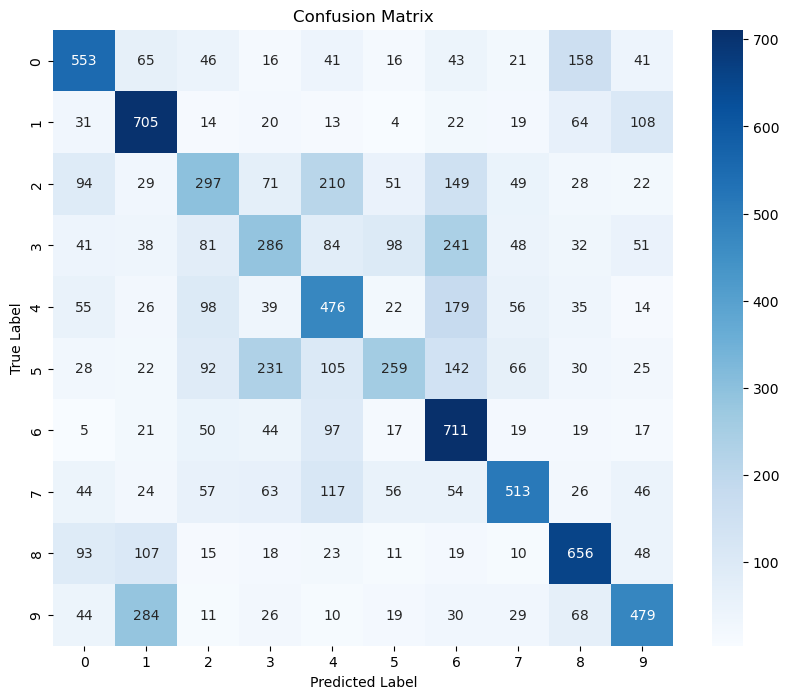

In [25]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

